## Model definition

In [1]:
using MomentClosure, Catalyst

In [2]:
#= Notes:
  -`\rightarrow` indicates mass-action reactions 
    for which the propensity functions are constructed accordingly
    to the law of mass action. 
  - the system-size parameter Ω must be included manually
=#

rn = @reaction_network begin
  (c₁/Ω^2), 2X + Y → 3X
  (c₂), X → Y
  (c₃*Ω, c₄), 0 ↔ X
end c₁ c₂ c₃ c₄ Ω

Model ##ReactionSystem#291 with 4 equations
States (2):
  X(t)
  Y(t)
Parameters (5):
  c₁
  c₂
  c₃
  c₄
  Ω

In [3]:
# net stoichiometry matrix
netstoichmat(rn)

2×4 Matrix{Int64}:
  1  -1  1  -1
 -1   1  0   0

In [4]:
# vector of propensity functions
propensities(rn, combinatoric_ratelaw=false)

4-element Vector{SymbolicUtils.Symbolic{Real}}:
 (c₁*(X(t) - 1)*X(t)*Y(t)) / (Ω^2)
 c₂*X(t)
 c₃*Ω
 c₄*X(t)

In [5]:
# using MomentClosure's ReactionSystemMod

@parameters t, c₁, c₂, c₃, c₄, Ω
@variables X(t), Y(t)

# stoichiometric matrix
S_mat = [ 1 -1  1 -1;
         -1  1  0  0]

# propensity functions
a = [c₁*X*Y*(X-1)/Ω^2, c₂*X, c₃*Ω, c₄*X]

rn2 = ReactionSystemMod(t, [X, Y], [c₁, c₂, c₃, c₄, Ω], a, S_mat)

ReactionSystemMod(t, Term{Real, Base.ImmutableDict{DataType, Any}}[X(t), Y(t)], Sym{Real, Base.ImmutableDict{DataType, Any}}[c₁, c₂, c₃, c₄, Ω], SymbolicUtils.Symbolic{Real}[(c₁*(X(t) - 1)*X(t)*Y(t)) / (Ω^2), c₂*X(t), c₃*Ω, c₄*X(t)], [1 -1 1 -1; -1 1 0 0], Symbol("##ReactionSystemMod#296"))

## Generating moment equations

In [6]:
# raw moment equations
raw_eqs = generate_raw_moment_eqs(rn, 2, combinatoric_ratelaw=false)

MomentClosure.RawMomentEquations(ODESystem(Equation[Differential(t)(μ₁₀(t)) ~ c₃*Ω + (c₁*μ₂₁(t)) / (Ω^2) + (-c₁*μ₁₁(t)) / (Ω^2) - c₂*μ₁₀(t) - c₄*μ₁₀(t), Differential(t)(μ₀₁(t)) ~ c₂*μ₁₀(t) + (c₁*μ₁₁(t)) / (Ω^2) + (-c₁*μ₂₁(t)) / (Ω^2), Differential(t)(μ₂₀(t)) ~ c₂*μ₁₀(t) + c₃*Ω + c₄*μ₁₀(t) + (c₁*μ₂₁(t)) / (Ω^2) + (-c₁*μ₁₁(t)) / (Ω^2) + (-2.0c₁*μ₂₁(t)) / (Ω^2) + (2.0c₁*μ₃₁(t)) / (Ω^2) + 2.0c₃*Ω*μ₁₀(t) - 2.0c₂*μ₂₀(t) - 2.0c₄*μ₂₀(t), Differential(t)(μ₁₁(t)) ~ c₂*μ₂₀(t) + (c₁*μ₁₁(t)) / (Ω^2) + (c₁*μ₂₁(t)) / (Ω^2) + (c₁*μ₂₂(t)) / (Ω^2) + (-c₁*μ₁₂(t)) / (Ω^2) + (-c₁*μ₂₁(t)) / (Ω^2) + (-c₁*μ₃₁(t)) / (Ω^2) + c₃*Ω*μ₀₁(t) - c₂*μ₁₀(t) - c₂*μ₁₁(t) - c₄*μ₁₁(t), Differential(t)(μ₀₂(t)) ~ c₂*μ₁₀(t) + (c₁*μ₂₁(t)) / (Ω^2) + (-c₁*μ₁₁(t)) / (Ω^2) + (2.0c₁*μ₁₂(t)) / (Ω^2) + (-2.0c₁*μ₂₂(t)) / (Ω^2) + 2.0c₂*μ₁₁(t)], t, Term{Real, Base.ImmutableDict{DataType, Any}}[μ₁₀(t), μ₀₁(t), μ₂₀(t), μ₁₁(t), μ₀₂(t), μ₂₁(t), μ₁₂(t), μ₃₁(t), μ₂₂(t)], Sym{Real, Base.ImmutableDict{DataType, Any}}[c₁, c₂, c₃, c₄, Ω], Dict{Any

In [7]:
using Latexify
latexify(raw_eqs)

"\\begin{align*}\n\\frac{d\\mu{_{10}}}{dt} =& c{_3} \\Omega + \\frac{c{_1} \\mu{_{21}}}{\\Omega^{2}} + \\frac{\\left(  - c{_1} \\right) \\mu{_{11}}}{\\Omega^{2}} - c{_2} \\mu{_{10}} - c{_4} \\mu{_{10}} \\\\\n\\frac{d\\mu{_{01}}}{dt} =& c{_2} \\mu{_{10}} + \\frac{c{_1} \\mu{_{11}}}{\\Omega^{2}} +" ⋯ 776 bytes ⋯ "_4} \\mu{_{11}} \\\\\n\\frac{d\\mu{_{02}}}{dt} =& c{_2} \\mu{_{10}} + \\frac{c{_1} \\mu{_{21}}}{\\Omega^{2}} + \\frac{\\left(  - c{_1} \\right) \\mu{_{11}}}{\\Omega^{2}} + \\frac{2 c{_1} \\mu{_{12}}}{\\Omega^{2}} + \\frac{-2 c{_1} \\mu{_{22}}}{\\Omega^{2}} + 2 c{_2} \\mu{_{11}}\n\\end{align*}\n"

In [11]:
# central moment equations
central_eqs = generate_central_moment_eqs(rn, 2, combinatoric_ratelaw=false)
latexify(central_eqs)

"\\begin{align*}\n\\frac{d\\mu{_{10}}}{dt} =& c{_3} \\Omega + \\frac{2 c{_1} M{_{11}} \\mu{_{10}} - c{_1} M{_{11}}}{\\Omega^{2}} + \\frac{c{_1} \\mu{_{10}}^{2} \\mu{_{01}} - c{_1} \\mu{_{01}} \\mu{_{10}}}{\\Omega^{2}} + \\frac{c{_1} M{_{21}}}{\\Omega^{2}} + \\frac{c{_1} M{_{20}} \\mu{_{01" ⋯ 2443 bytes ⋯ " \\mu{_{01}} - 4 c{_1} M{_{11}} \\mu{_{01}} \\mu{_{10}}}{\\Omega^{2}} + \\frac{c{_1} M{_{21}}}{\\Omega^{2}} + \\frac{-2 c{_1} M{_{22}}}{\\Omega^{2}} + \\frac{c{_1} M{_{20}} \\mu{_{01}}}{\\Omega^{2}} + \\frac{-2 c{_1} M{_{21}} \\mu{_{01}}}{\\Omega^{2}} + 2 c{_2} M{_{11}}\n\\end{align*}\n"

## Performing moment closure

In [9]:
# normal closure on raw moment equations
closed_raw_eqs = moment_closure(raw_eqs, "normal")
latexify(closed_raw_eqs)

"\\begin{align*}\n\\frac{d\\mu{_{10}}}{dt} =& c{_3} \\Omega + \\frac{c{_1} \\mu{_{01}} \\mu{_{20}} + 2 c{_1} \\mu{_{10}} \\mu{_{11}} - 2 c{_1} \\mu{_{10}}^{2} \\mu{_{01}}}{\\Omega^{2}} + \\frac{\\left(  - c{_1} \\right) \\mu{_{11}}}{\\Omega^{2}} - c{_2} \\mu{_{10}} - c{_4} \\mu{_{10}} \\\\\n\\f" ⋯ 1662 bytes ⋯ "1}} \\mu{_{11}} - 4 c{_1} \\mu{_{01}}^{2} \\mu{_{10}}}{\\Omega^{2}} + \\frac{4 c{_1} \\mu{_{01}}^{2} \\mu{_{10}}^{2} - 4 c{_1} \\mu{_{11}}^{2} - 2 c{_1} \\mu{_{02}} \\mu{_{20}}}{\\Omega^{2}} + \\frac{\\left(  - c{_1} \\right) \\mu{_{11}}}{\\Omega^{2}} + 2 c{_2} \\mu{_{11}}\n\\end{align*}\n"

In [10]:
# higher order moment closure functions
latexify(closed_raw_eqs, :closure)

"\\begin{align*}\n\\mu{_{21}} =& \\mu{_{01}} \\mu{_{20}} + 2 \\mu{_{10}} \\mu{_{11}} - 2 \\mu{_{10}}^{2} \\mu{_{01}} \\\\\n\\mu{_{12}} =& \\mu{_{02}} \\mu{_{10}} + 2 \\mu{_{01}} \\mu{_{11}} - 2 \\mu{_{01}}^{2} \\mu{_{10}} \\\\\n\\mu{_{31}} =& \\mu{_{01}} \\mu{_{30}} + 6 \\mu{_{10}}^{3} \\mu{_{01}} " ⋯ 103 bytes ⋯ "10}} \\mu{_{20}} \\\\\n\\mu{_{22}} =& 2 \\mu{_{11}}^{2} + \\mu{_{02}} \\mu{_{20}} + 6 \\mu{_{01}}^{2} \\mu{_{10}}^{2} + 2 \\mu{_{01}} \\mu{_{21}} + 2 \\mu{_{10}} \\mu{_{12}} - 2 \\mu{_{01}}^{2} \\mu{_{20}} - 2 \\mu{_{10}}^{2} \\mu{_{02}} - 8 \\mu{_{01}} \\mu{_{10}} \\mu{_{11}}\n\\end{align*}\n"

In [12]:
println(latexify(closed_raw_eqs, :closure))

\begin{align*}
\mu{_{21}} =& \mu{_{01}} \mu{_{20}} + 2 \mu{_{10}} \mu{_{11}} - 2 \mu{_{10}}^{2} \mu{_{01}} \\
\mu{_{12}} =& \mu{_{02}} \mu{_{10}} + 2 \mu{_{01}} \mu{_{11}} - 2 \mu{_{01}}^{2} \mu{_{10}} \\
\mu{_{31}} =& \mu{_{01}} \mu{_{30}} + 6 \mu{_{10}}^{3} \mu{_{01}} + 3 \mu{_{10}} \mu{_{21}} + 3 \mu{_{11}} \mu{_{20}} - 6 \mu{_{10}}^{2} \mu{_{11}} - 6 \mu{_{01}} \mu{_{10}} \mu{_{20}} \\
\mu{_{22}} =& 2 \mu{_{11}}^{2} + \mu{_{02}} \mu{_{20}} + 6 \mu{_{01}}^{2} \mu{_{10}}^{2} + 2 \mu{_{01}} \mu{_{21}} + 2 \mu{_{10}} \mu{_{12}} - 2 \mu{_{01}}^{2} \mu{_{20}} - 2 \mu{_{10}}^{2} \mu{_{02}} - 8 \mu{_{01}} \mu{_{10}} \mu{_{11}}
\end{align*}



In [13]:
# normal closure on central moment equations
closed_central_eqs = moment_closure(central_eqs, "normal")
latexify(closed_central_eqs)

"\\begin{align*}\n\\frac{d\\mu{_{10}}}{dt} =& c{_3} \\Omega + \\frac{2 c{_1} M{_{11}} \\mu{_{10}} - c{_1} M{_{11}}}{\\Omega^{2}} + \\frac{c{_1} \\mu{_{10}}^{2} \\mu{_{01}} - c{_1} \\mu{_{01}} \\mu{_{10}}}{\\Omega^{2}} + \\frac{c{_1} M{_{20}} \\mu{_{01}}}{\\Omega^{2}} - c{_2} \\mu{_{10}} -" ⋯ 1815 bytes ⋯ "20}}}{\\Omega^{2}} + \\frac{2 c{_1} M{_{02}} \\mu{_{10}} - 2 c{_1} \\mu{_{10}}^{2} M{_{02}}}{\\Omega^{2}} + \\frac{2 c{_1} M{_{11}} \\mu{_{01}} - 4 c{_1} M{_{11}} \\mu{_{01}} \\mu{_{10}}}{\\Omega^{2}} + \\frac{c{_1} M{_{20}} \\mu{_{01}}}{\\Omega^{2}} + 2 c{_2} M{_{11}}\n\\end{align*}\n"

In [14]:
latexify(closed_central_eqs, :closure)

L"\begin{align*}
M{_{30}} =& 0 \\
M{_{21}} =& 0 \\
M{_{12}} =& 0 \\
M{_{31}} =& 3 M{_{11}} M{_{20}} \\
M{_{22}} =& 2 M{_{11}}^{2} + M{_{02}} M{_{20}}
\end{align*}
"

In [15]:
println(latexify(closed_central_eqs, :closure))

\begin{align*}
M{_{30}} =& 0 \\
M{_{21}} =& 0 \\
M{_{12}} =& 0 \\
M{_{31}} =& 3 M{_{11}} M{_{20}} \\
M{_{22}} =& 2 M{_{11}}^{2} + M{_{02}} M{_{20}}
\end{align*}



## Solving the moment equations

In [16]:
# check the ordering of parameters in the model
paramsmap(rn)

Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 5 entries:
  c₃ => 3
  c₁ => 1
  c₂ => 2
  Ω  => 5
  c₄ => 4

In [17]:
# check the ordering of species in the model
speciesmap(rn)

Dict{Term{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 2 entries:
  X(t) => 1
  Y(t) => 2

In [18]:
# parameter values [c₁, c₂, c₃, c₄, Ω]
p = [0.9, 2, 1, 1, 100]

# initial molecule numbers of species [X, Y]
u₀ = [1, 1]

# deterministic initial conditions
u₀map = deterministic_IC(u₀, closed_raw_eqs) 

# time interval to solve one on
tspan = (0., 100.)

# convert the closed raw moment equations into a DifferentialEquations ODEProblem
oprob = ODEProblem(closed_raw_eqs, u₀map, tspan, p)

using OrdinaryDiffEq
# solve using Tsit5() solver
@time sol = solve(oprob, Tsit5(), saveat=0.1);

  3.840357 seconds (4.99 M allocations: 273.141 MiB, 3.87% gc time, 99.98% compilation time)


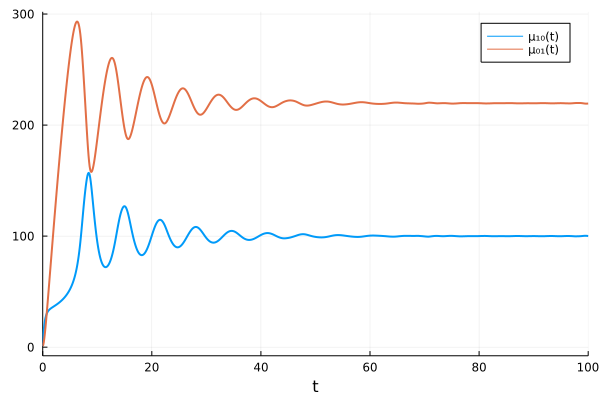

In [19]:
using Plots
plot(sol, vars=(0, [1,2]), lw=2)

In [20]:
# Run SSA
using DiffEqJump

# convert ReactionSystem into JumpSystem
# Note: can directly convert the ReactionSystem to DiscreteProblem 
# but then combinatoric_ratelaws cannot be set
jsys = convert(JumpSystem, rn, combinatoric_ratelaws=false)

# create a DiscreteProblem encoding that the molecule numbers are integer-valued
dprob = DiscreteProblem(jsys, u₀, tspan, p) # same parameters as defined earlier

# create a JumpProblem: specify Gillespie's Direct Method as the solver
# and SET save_positions to (false, false) as otherwise time of each
# reaction occurence would be saved (complicating moment estimates)
jprob = JumpProblem(jsys, dprob, Direct(), save_positions=(false, false))

# define an EnsembleProblem to simulate multiple trajectories
ensembleprob  = EnsembleProblem(jprob)

# simulate 10000 SSA trajectories
@time sol_SSA = solve(ensembleprob, SSAStepper(), saveat=0.1, trajectories=10000);

 30.015866 seconds (14.77 M allocations: 1.155 GiB, 2.59% gc time, 8.04% compilation time)


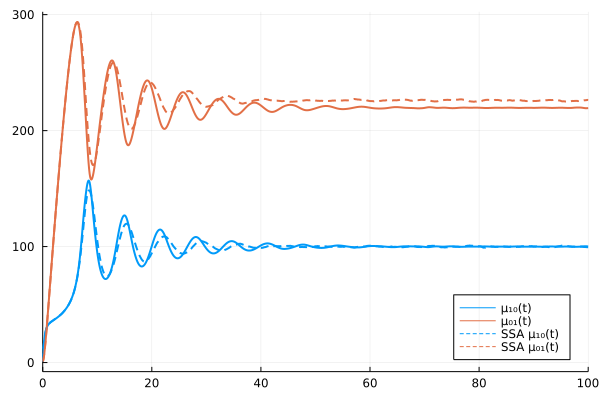

In [21]:
using DiffEqBase.EnsembleAnalysis

means_SSA = timeseries_steps_mean(sol_SSA)
plot!(means_SSA, lw=2, labels=["SSA μ₁₀(t)" "SSA μ₀₁(t)"], linestyle=:dash, 
      linecolor=[1 2], background_color_legend=nothing, legend=:bottomright)